In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
from folium.plugins import MarkerCluster


In [2]:
df=pd.read_csv(r"C:\Users\Mihir Patel\Downloads\US_Accidents_March23.csv\US_Accidents_March23.csv")

In [3]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.shape

(7728394, 46)

In [5]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3554549 entries, 3402762 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)      

In [8]:
df['Weather_Timestamp'].value_counts()

Weather_Timestamp
2022-03-13 01:53:00    1116
2021-01-26 15:53:00     619
2022-05-13 16:53:00     525
2022-05-17 15:53:00     475
2022-04-29 14:53:00     463
                       ... 
2021-12-05 19:28:00       1
2021-08-15 01:20:00       1
2021-05-29 23:01:00       1
2021-12-10 09:06:00       1
2019-08-23 20:50:00       1
Name: count, Length: 440189, dtype: int64

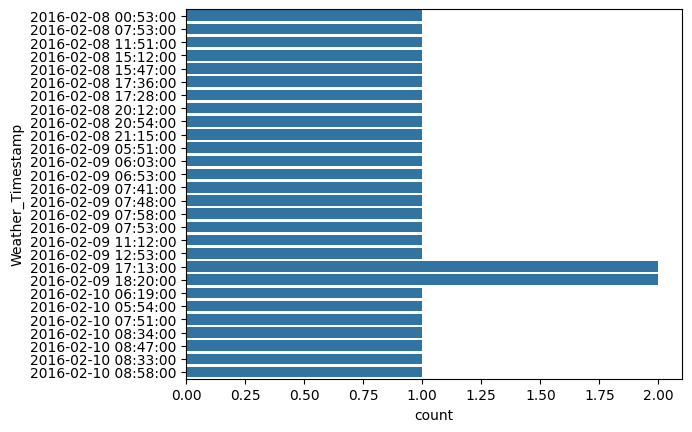

In [9]:
sns.countplot(y="Weather_Timestamp",data=df[: 30])
plt.show()

C:\Users\Mihir Patel\AppData\Local\Temp\ipykernel_10488\3095869010.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="City",data=df[: 30],palette="Set1")


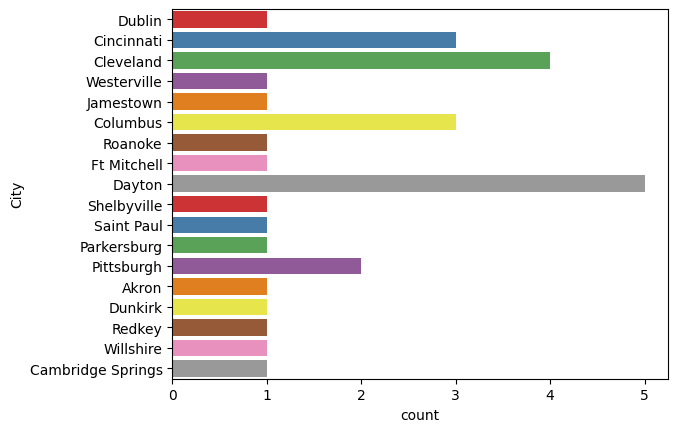

In [10]:
sns.countplot(y="City",data=df[: 30],palette="Set1")
plt.show()

In [11]:
df.Start_Time=pd.to_datetime(df.Start_Time,format='mixed')
df.Start_Time

3402762   2016-02-08 00:37:08
3402767   2016-02-08 07:53:43
3402771   2016-02-08 11:51:46
3402773   2016-02-08 15:16:43
3402774   2016-02-08 15:43:50
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 3554549, dtype: datetime64[ns]

In [12]:
df['start_hr']=df.Start_Time.dt.time
df['start_hr']

3402762    00:37:08
3402767    07:53:43
3402771    11:51:46
3402773    15:16:43
3402774    15:43:50
             ...   
7728389    18:03:25
7728390    19:11:30
7728391    19:00:21
7728392    19:00:21
7728393    18:52:06
Name: start_hr, Length: 3554549, dtype: object

In [13]:
time_of_accident=df.start_hr.value_counts()
time_of_accident

start_hr
15:45:00    1961
15:50:00    1909
15:51:00    1907
15:41:00    1899
14:47:00    1897
            ... 
03:01:06       1
11:09:14       1
01:59:23       1
02:06:48       1
03:58:39       1
Name: count, Length: 86231, dtype: int64

start_hr
15:45:00    1961
15:50:00    1909
15:51:00    1907
15:41:00    1899
14:47:00    1897
            ... 
09:16:00    1001
10:10:00    1001
20:52:00    1000
21:12:00    1000
11:29:00    1000
Name: count, Length: 794, dtype: int64 
 start_hr
11:15:00    999
20:09:00    999
10:33:00    999
10:44:00    998
19:49:00    998
           ... 
03:01:06      1
11:09:14      1
01:59:23      1
02:06:48      1
03:58:39      1
Name: count, Length: 85437, dtype: int64


<Axes: ylabel='start_hr'>

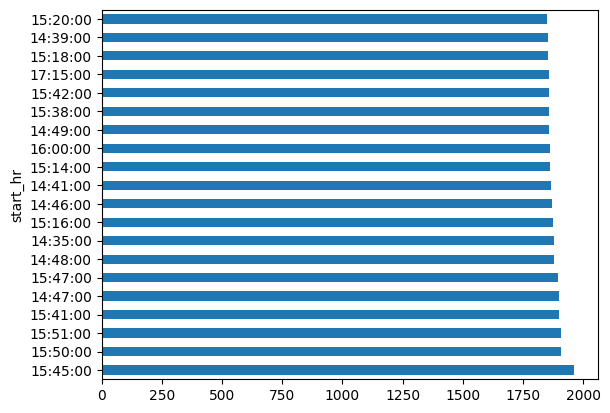

In [14]:
time_of_accident_high=time_of_accident[time_of_accident>=1000]
time_of_accident_low=time_of_accident[time_of_accident<1000]

print(time_of_accident_high,'\n',time_of_accident_low)


time_of_accident_high[:20].plot(kind='barh')

In [15]:
df.Start_Lng

3402762    -83.092860
3402767    -84.492792
3402771    -81.820170
3402773    -82.968490
3402774    -84.477230
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 3554549, dtype: float64

In [16]:
df_loc = df.loc[(~df.Start_Lat.isna()) & (~df.Start_Lng.isna())]

In [17]:
def create_map(df_loc, latitude, longitude, zoom, tiles='OpenStreetMap'):
    """
    Generate a Folium Map with clustered markers of accident locations.
    """
    world_map = folium.Map(location=[latitude, longitude], zoom_start=zoom, tiles=tiles)
    marker_cluster = MarkerCluster().add_to(world_map)

    # Iterate over the DataFrame rows and add each marker to the cluster
    for idx, row in df_loc.iterrows():
        folium.Marker(
            location=[row['Start_Lat'], row['Start_Lng']],
            # You can add more attributes to your marker here, such as a popup
            popup=f"Lat, Lng: {row['Start_Lat']}, {row['Start_Lng']}"
        ).add_to(marker_cluster)

    return world_map

In [18]:
us_cities_coords = {
    "New York": {"lat": 40.7128, "lon": -74.0060},
    "Los Angeles": {"lat": 34.0522, "lon": -118.2437},
    "Chicago": {"lat": 41.8781, "lon": -87.6298},
    "Houston": {"lat": 29.7604, "lon": -95.3698},
    "Phoenix": {"lat": 33.4484, "lon": -112.0740},
    "Philadelphia": {"lat": 39.9526, "lon": -75.1652},
    "San Antonio": {"lat": 29.4241, "lon": -98.4936},
    "San Diego": {"lat": 32.7157, "lon": -117.1611},
    "Dallas": {"lat": 32.7767, "lon": -96.7970},
    "San Jose": {"lat": 37.3382, "lon": -121.8863},
    "Austin": {"lat": 30.2672, "lon": -97.7431},
    "Jacksonville": {"lat": 30.3322, "lon": -81.6557},
    "Fort Worth": {"lat": 32.7555, "lon": -97.3308},
    "Columbus": {"lat": 39.9612, "lon": -82.9988},
    "San Francisco": {"lat": 37.7749, "lon": -122.4194},
    "Charlotte": {"lat": 35.2271, "lon": -80.8431},
    "Indianapolis": {"lat": 39.7684, "lon": -86.1581},
    "Seattle": {"lat": 47.6062, "lon": -122.3321},
    "Denver": {"lat": 39.7392, "lon": -104.9903},
    "Washington": {"lat": 38.9072, "lon": -77.0369}
}

In [19]:
categorical=[i for i in df.columns if df[i].dtype=='O']
print('The categorical variables are',categorical)

The categorical variables are ['ID', 'Source', 'End_Time', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'start_hr']


In [20]:
for i in categorical:
    df[i].fillna(df[i].mode()[0],inplace=True)

df.isna().sum()

C:\Users\Mihir Patel\AppData\Local\Temp\ipykernel_10488\3975780361.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)


ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
S

In [21]:
amenity = df.Amenity.groupby(df.Severity).value_counts()
amenity
railway = df.Railway.groupby(df.Severity).value_counts()
railway
traffic_calming = df.Traffic_Calming.groupby(df.Severity).value_counts()
traffic_calming
stop = df.Stop.groupby(df.Severity).value_counts()
stop
traffic_signal = df.Traffic_Signal.groupby(df.Severity).value_counts()
traffic_signal


Severity  Traffic_Signal
1         False               13495
          True                12072
2         False             3059979
          True               288466
3         False               56510
          True                11516
4         False              100392
          True                12119
Name: count, dtype: int64

In [22]:
df['Visibility(mi)'].value_counts()
df[(df.Severity == 4) & (df['Visibility(mi)'] <=10)] 

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,start_hr
3402806,A-3412689,Source1,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.451120,-85.150480,40.354290,-85.149930,6.690,...,False,False,False,False,False,Night,Day,Day,Day,18:20:58
3402807,A-3412690,Source1,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.354290,-85.149930,40.451120,-85.150480,6.690,...,False,False,False,False,False,Night,Day,Day,Day,18:20:58
3402810,A-3412693,Source1,4,2016-02-10 06:17:32,2016-02-10 12:17:32,39.965148,-83.020499,39.976605,-83.021071,0.792,...,False,False,False,False,False,Night,Night,Night,Day,06:17:32
3402811,A-3412694,Source1,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.728130,-84.789650,40.745590,-84.789620,1.206,...,False,False,False,False,False,Night,Night,Night,Day,06:18:49
3402903,A-3412786,Source1,4,2016-02-12 19:29:53,2016-02-13 01:29:53,41.184738,-80.432713,41.191890,-80.246370,9.702,...,False,False,False,False,False,Night,Night,Night,Night,19:29:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728354,A-7777722,Source1,4,2019-08-23 17:25:12,2019-08-23 17:54:00,38.995930,-121.672020,39.003170,-121.662679,0.708,...,False,False,False,False,False,Day,Day,Day,Day,17:25:12
7728355,A-7777723,Source1,4,2019-08-23 17:25:12,2019-08-23 17:54:00,39.003170,-121.662679,38.995930,-121.672020,0.708,...,False,False,False,False,False,Day,Day,Day,Day,17:25:12
7728366,A-7777734,Source1,4,2019-08-23 13:39:48,2019-08-23 14:05:33,33.685990,-117.886260,33.685370,-117.885720,0.053,...,False,False,False,False,False,Day,Day,Day,Day,13:39:48
7728367,A-7777735,Source1,4,2019-08-23 13:39:48,2019-08-23 14:05:33,33.687300,-117.890190,33.685990,-117.886260,0.243,...,False,False,False,False,False,Day,Day,Day,Day,13:39:48


In [23]:
(len(df[df['Visibility(mi)'] <=2]) / len(df) )* 100.

5.428002258514372

In [24]:
(len(df[(df['Visibility(mi)'] <=2) & (df['Severity'] ==4)]) / len(df)) * 100. 

0.20683355328622563

In [25]:
weather = df.Weather_Condition.value_counts()

In [26]:
(len(df[(df['Visibility(mi)'] <=2) & (df['Severity'] ==4)]) / len(df)) * 100. 
weather[weather > 1000]

Weather_Condition
Fair                       1697787
Cloudy                      524654
Mostly Cloudy               457519
Partly Cloudy               311743
Light Rain                  164310
Light Snow                   78648
Fog                          54955
Rain                         38659
Haze                         34003
Fair / Windy                 25211
Heavy Rain                   15122
Thunder in the Vicinity      11984
Cloudy / Windy               11468
Mostly Cloudy / Windy        11312
T-Storm                      10322
Snow                          9841
Thunder                       9839
Light Drizzle                 9113
Wintry Mix                    8965
Light Rain with Thunder       8646
Partly Cloudy / Windy         7132
Heavy T-Storm                 6037
Smoke                         5751
Light Snow / Windy            5496
Light Rain / Windy            5389
Overcast                      4098
Heavy Snow                    3410
N/A Precipitation             2418
Dr

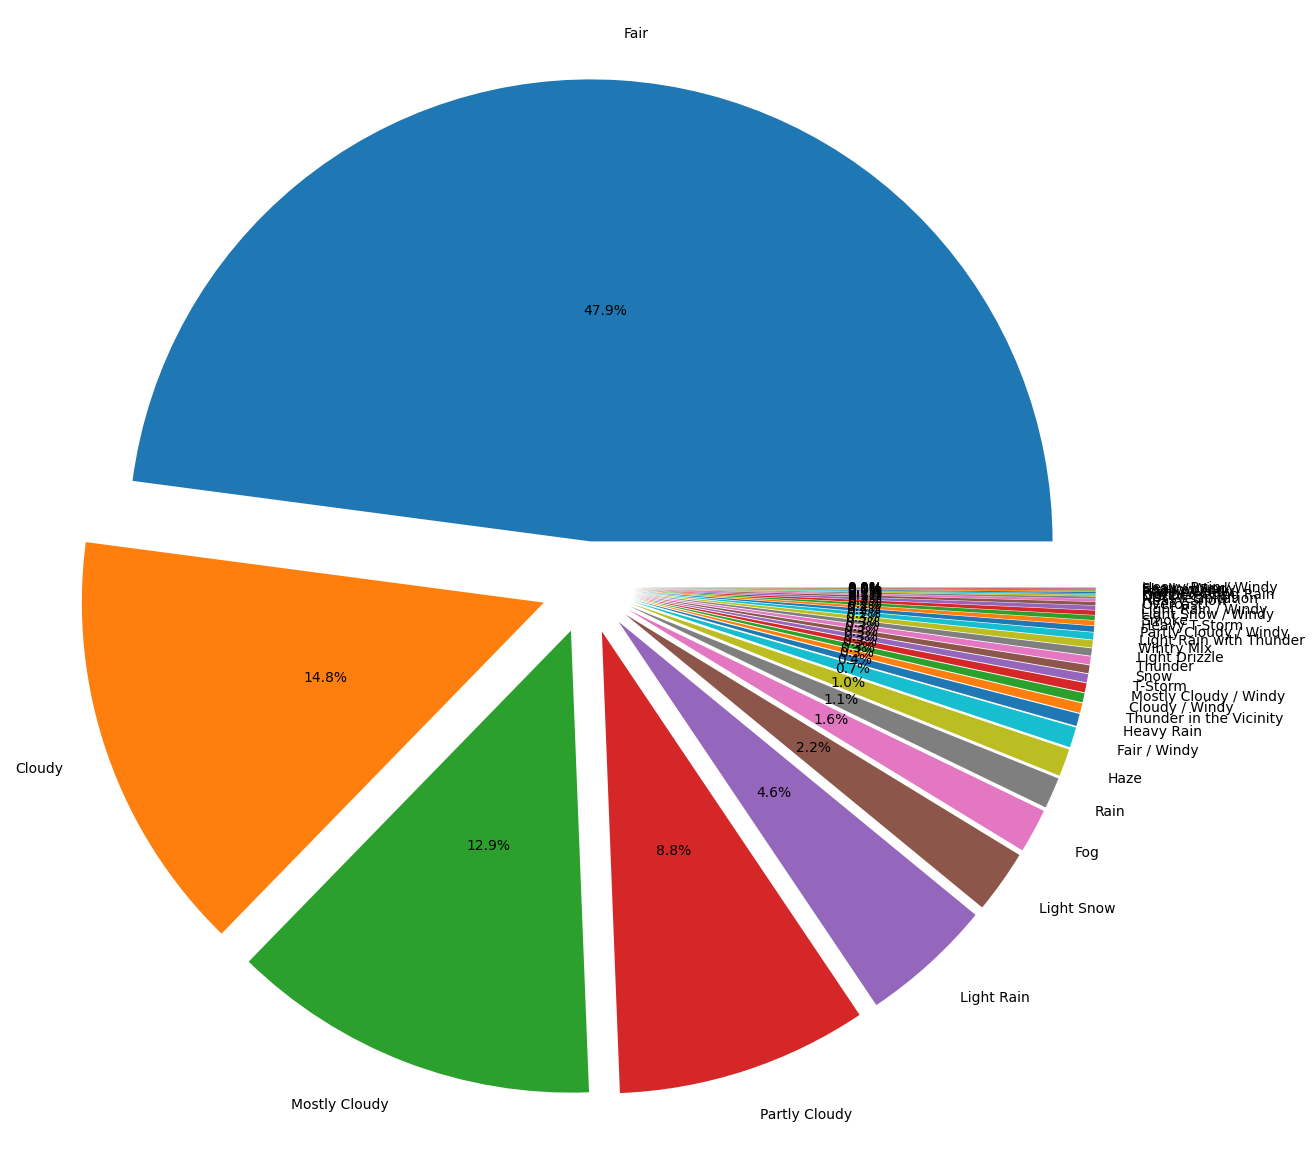

In [27]:
pie, ax = plt.subplots(figsize=[15,15])
labels = weather[weather > 1000].keys()
plt.pie(x=weather[weather > 1000], autopct="%.1f%%", explode=[0.1]*len(weather[weather > 1000]), labels=labels, pctdistance=0.5)
plt.show();

In [28]:
null_cols = [i for i in df.columns if df[i].isnull().any()]
print(null_cols)
#mn.matrix(df[null_cols]);

[]


In [29]:
new_data_a = df.drop(columns=["End_Lng", "End_Lat", "Description"], axis=0)

In [30]:
new_data_a = df.drop(columns=["End_Lng", "End_Lat", "Description"], axis=0)

In [31]:
new_data_b = new_data_a.dropna(subset = ['Visibility(mi)','Weather_Condition','Humidity(%)','Temperature(F)','Wind_Direction','Pressure(in)','Weather_Timestamp','Airport_Code','Timezone','Zipcode','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','City'])

new_data_b.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
T

In [32]:
final_data = new_data_b.drop(columns = 'ID', axis=0)
final_data.isnull().sum()

Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
T

C:\Users\Mihir Patel\AppData\Local\Temp\ipykernel_10488\3301041443.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  c = sns.countplot(x="City", data=final_data, order=final_data.City.value_counts().iloc[:50].index, orient = 'v', palette = "crest_r")
C:\Users\Mihir Patel\AppData\Local\Temp\ipykernel_10488\3301041443.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  c.set_xticklabels(c.get_xticklabels(), rotation=90)


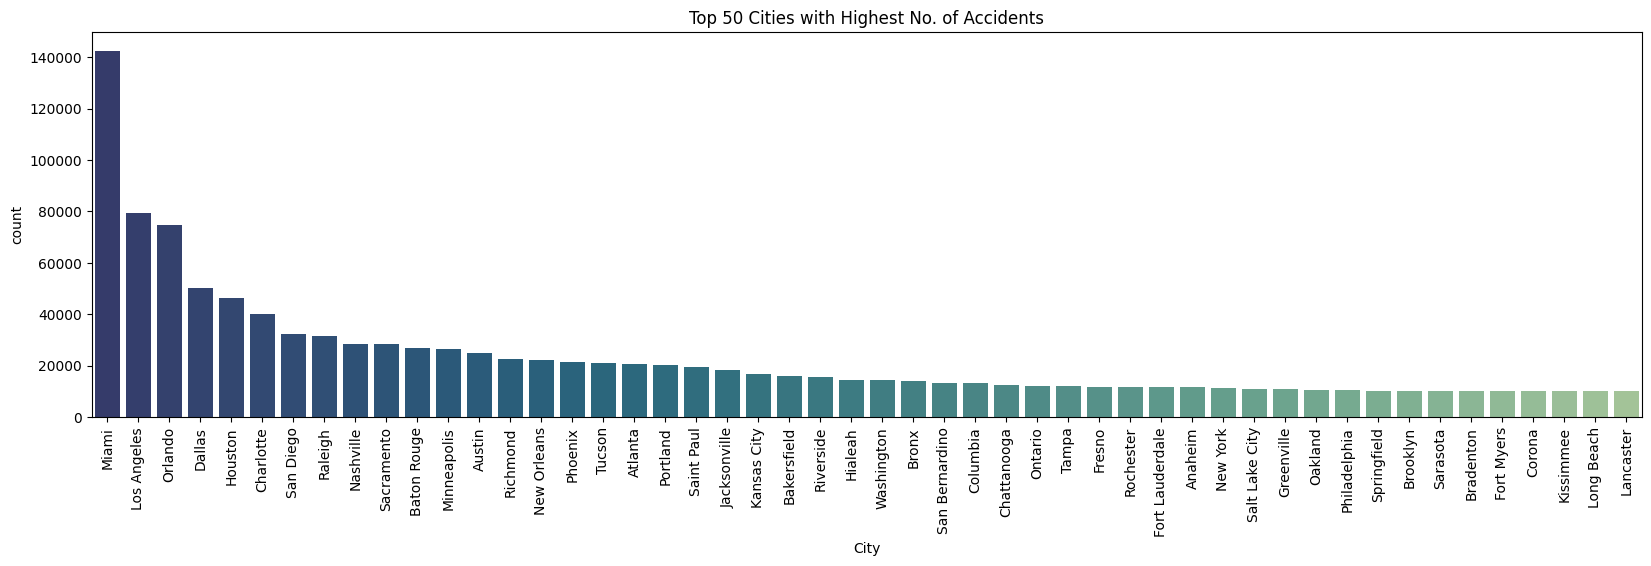

In [33]:
fig, ax = plt.subplots(figsize = (20,5))
c = sns.countplot(x="City", data=final_data, order=final_data.City.value_counts().iloc[:50].index, orient = 'v', palette = "crest_r")
c.set_title("Top 50 Cities with Highest No. of Accidents")
c.set_xticklabels(c.get_xticklabels(), rotation=90)
plt.show()